<a href="https://colab.research.google.com/github/Programming-Communities/Assignment-Q2/blob/main/langchain_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [2]:
!pip install langchain_google_genai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.0 MB/s eta 0:00:00


In [3]:
!pip install openai langchain

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
import openai
from langchain.prompts import PromptTemplate

In [5]:
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "change this {question} into  a good image generative promt  ?"
)

Second_promt = PromptTemplate (
    input_variables = ["first_response"],
    template = "read this {first_response}   and summarize into two lines promt for image generation ?"
)

In [6]:
llm =  ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 75,
)

In [7]:

first_chain = first_prompt | llm
second_chain = Second_promt | llm

In [8]:
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [9]:
first_response = first_chain.invoke({"question" : input("write a image generation prompt ")})
print("First chain   " , first_response.content)


Second_response = second_chain.invoke({"first_response" : first_response.content})
print("Second chain   " , Second_response.content)


# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]

# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

write a image generation prompt Programming Communities
First chain    Here are several options for image generation prompts based on "Programming Communities," each with a slightly different emphasis:

**Option 1 (Abstract & Symbolic):**

> A vibrant, abstract network of interconnected nodes representing a programming community.  Nodes glow with different colors representing various programming languages.  Lines connecting nodes pulse with data streams.  Cyberpunk aesthetic.


**Option
Second chain    Cyberpunk-style abstract network of glowing nodes representing a programming community, with connecting lines pulsing data.  Different node colors represent programming languages.


Generating the image...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


<class 'langchain_core.messages.ai.AIMessage'>


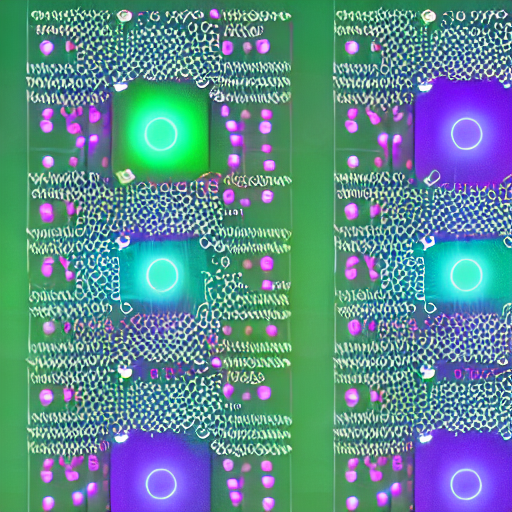

In [10]:

print(type(first_response))
image